## T2* Fitting
The t2star_fit module contains classes for estimating T2* or T2. Both these and the classes in dce_fit are subclasses of Fitter, which means they can be used to fit a single T2* value (using the proc method) or an entire image (using the proc_image method).

In [166]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../src')
import t2star_fit
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## T2* estimation methods (one value)
The method estimates T2*, using the exponential relationship between echo time and signal:

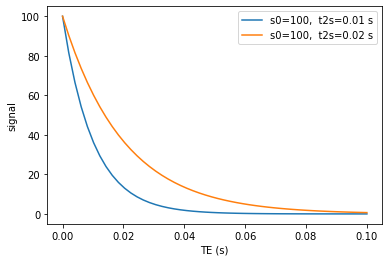

In [167]:
te_range = np.linspace(0, 100e-3, 50)
s_range_1 = t2star_fit.multiecho_signal(s0=100, t2s=10e-3, te=te_range)
s_range_2 = t2star_fit.multiecho_signal(s0=100, t2s=20e-3, te=te_range)
plt.plot(te_range, s_range_1, '-', label='s0=100,  t2s=0.01 s')
plt.plot(te_range, s_range_2, '-', label='s0=100,  t2s=0.02 s')
plt.xlabel('TE (s)')
plt.ylabel('signal');
plt.legend();

#### T2* fitting

Wall time: 0 ns
Fitted values (linear): s0 = 47.7, t2s = 0.0112 s
Wall time: 0 ns
Fitted values (non-linear): s0 = 115.2, t2s = 0.0075 s


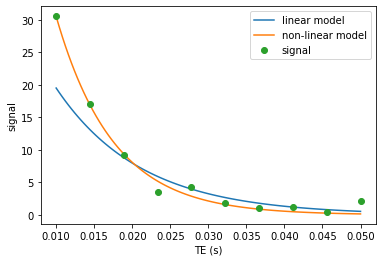

In [175]:
# Generate test data:
s0, t2s = 100, 8e-3
te = np.linspace(10e-3, 50e-3, 10)
te_plot_range = np.linspace(min(te), max(te), 100)

s = np.abs(s0 * np.exp(-te/t2s) + 1 * np.random.randn(*te.shape))

# Fit test data
min_signal = 0

%time s0_est_lin, t2s_est_lin = t2star_fit.MultiEchoT2sLinear(te, min_signal).proc(s)
print(f"Fitted values (linear): s0 = {s0_est_lin:.1f}, t2s = {t2s_est_lin:.4f} s")
%time s0_est_nonlin, t2s_est_nonlin = t2star_fit.MultiEchoT2sNonLinear(te, min_signal).proc(s)
print(f"Fitted values (non-linear): s0 = {s0_est_nonlin:.1f}, t2s = {t2s_est_nonlin:.4f} s")

# Plot data:
plt.plot(te_plot_range, t2star_fit.multiecho_signal(s0_est_lin, t2s_est_lin, te_plot_range), '-', label='linear model')
plt.plot(te_plot_range, t2star_fit.multiecho_signal(s0_est_nonlin, t2s_est_nonlin, te_plot_range), '-', label='non-linear model')
plt.plot(te, s, 'o', label='signal')
plt.xlabel('TE (s)')
plt.ylabel('signal');
plt.legend();